# Importing Necessary Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(palette="Set2")

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [3]:
#read data
data=pd.read_csv('Churn Modeling.csv')

In [4]:
# first five row of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The statistical summary of the dataset

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
# checking datatypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Dropping Irrelevant Feature
'RowNumber', 'CustomerId' and 'Surname' are irrelivant, so we drop those features.

In [7]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

# Data Visualization

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

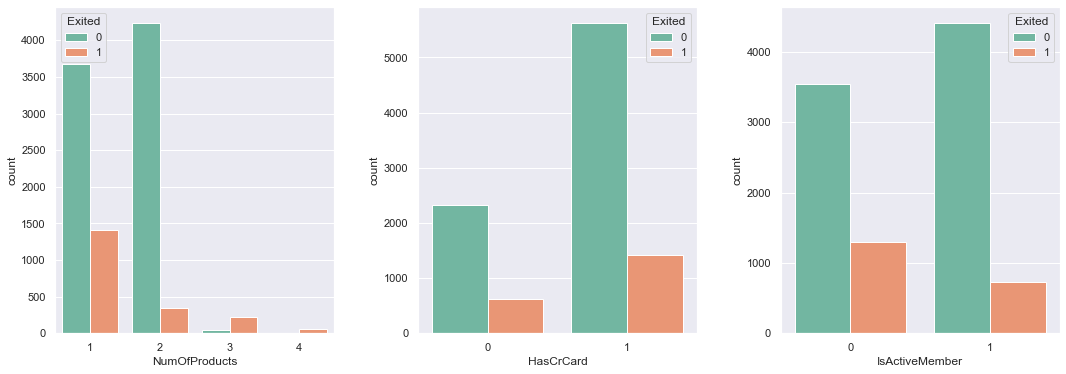

In [8]:
_,ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = data, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = data, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = data, ax = ax[2])

Customer with 3 or 4 products have higher chances to Churn.

Inactive customers also have greater chances of churn.

<AxesSubplot:xlabel='IsActiveMember', ylabel='Age'>

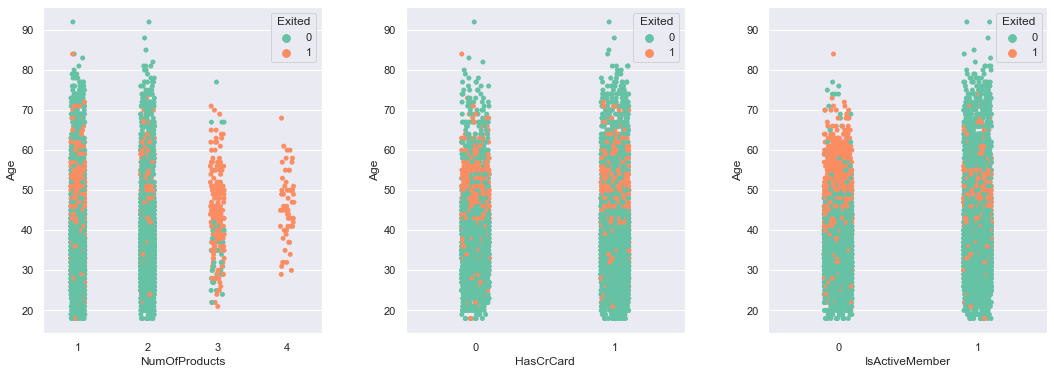

In [9]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.stripplot(x = "NumOfProducts", y = "Age", hue="Exited", data = data, ax= ax[0])
sns.stripplot(x = "HasCrCard", y = "Age", data = data, hue="Exited", ax = ax[1])
sns.stripplot(x = "IsActiveMember", y = "Age", hue="Exited", data = data, ax = ax[2])

As can be seen from above swarmplots:

-Customers with 3 or more products have high chances of churn.

-No relation can be seen with churn of customer having credit card or not.

-Inactive older age customers have very high chances of churn.

In [10]:
encoder=LabelEncoder()
data['Geography']=encoder.fit_transform(data.Geography)
data['Gender']=encoder.fit_transform(data.Gender)

<AxesSubplot:>

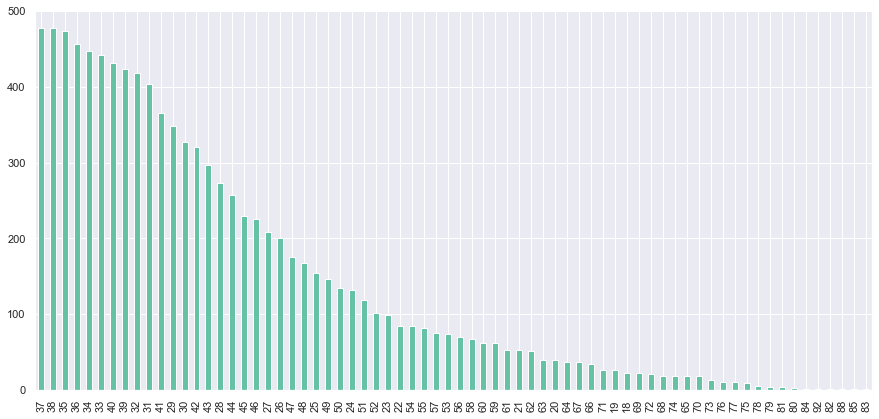

In [11]:
data['Age'].value_counts().plot.bar(figsize=(15,7))

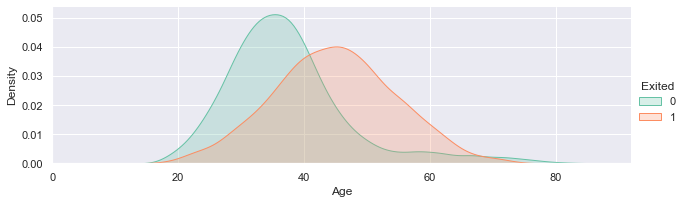

In [12]:
facet = sns.FacetGrid(data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, data["Age"].max()))
facet.add_legend()

plt.show()

Above distribution shows older age customers have high chances of churn.

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

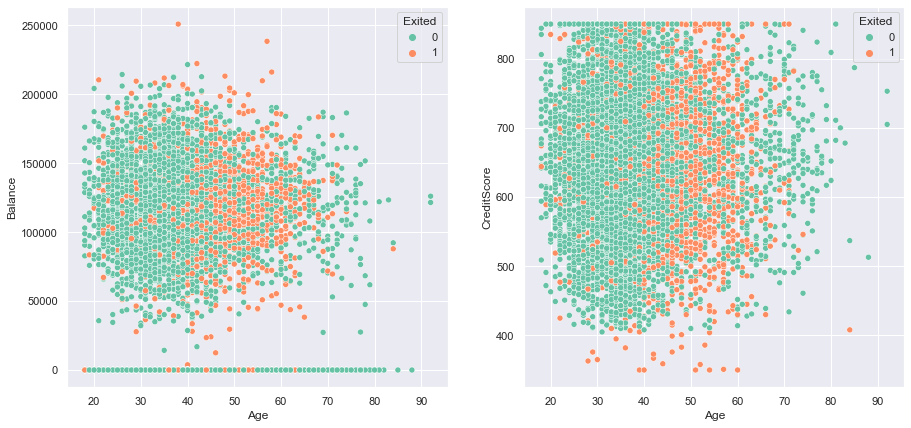

In [13]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = data, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = data, ax=ax[1])

40 to 70 years old customers are higher chances to churn
Customer with CreditScore less then 400 are higher chances to churn

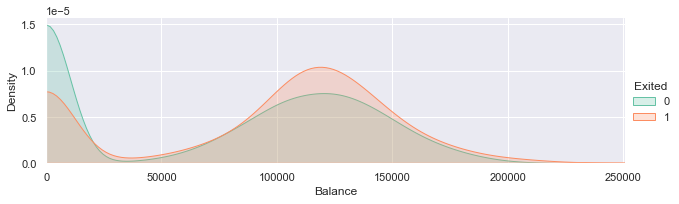

In [14]:
facet = sns.FacetGrid(data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, data["Balance"].max()))
facet.add_legend()

plt.show()

<AxesSubplot:xlabel='Balance', ylabel='CreditScore'>

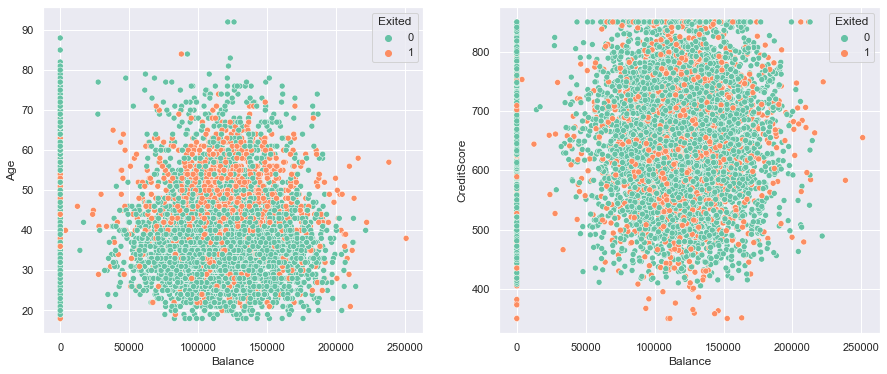

In [15]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = data, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = data, hue="Exited", ax = ax[1])

No inference can be made regarding customer's balance having any influence on churn.

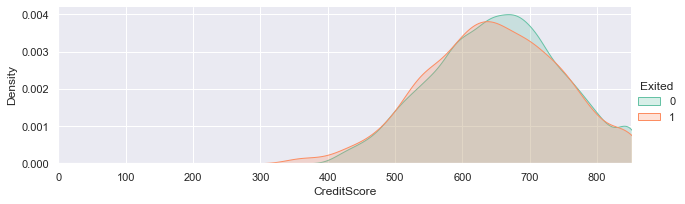

In [16]:
facet = sns.FacetGrid(data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, data["CreditScore"].max()))
facet.add_legend()

plt.show()

Detecting Outliers using Tukey Boxplot

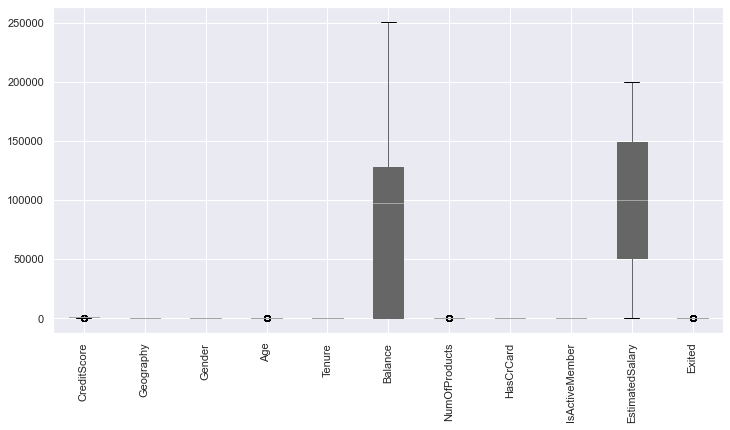

In [17]:
plt.figure(figsize=(12,6))
bplot = data.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

Checking Correlation

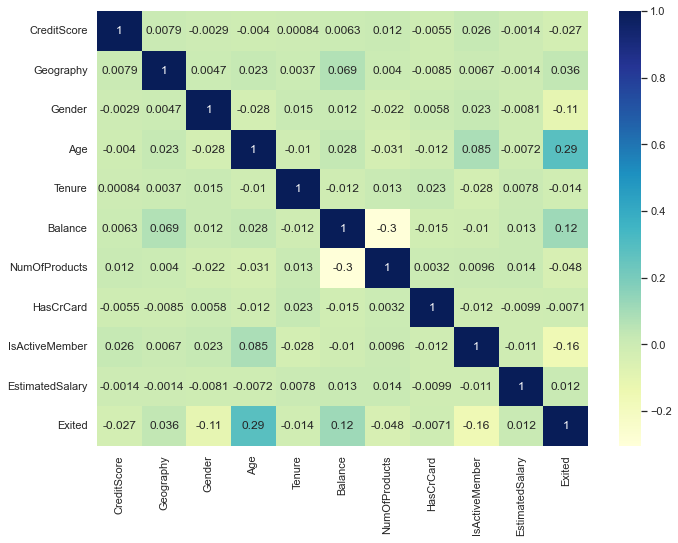

In [18]:
plt.subplots(figsize=(11,8))
sns.heatmap(data.corr(), annot=True, cmap = 'YlGnBu' )
plt.show()

# Feature Scaling:

In [19]:
scaler=MinMaxScaler()
data_scaled=pd.DataFrame(data=data)
data_scaled[:]=scaler.fit_transform(data_scaled[:])

In [20]:
data_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


# Prediction with ML models:

In [21]:
data_scaled.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [22]:
X=data_scaled.drop(['Exited','HasCrCard'], axis=1)
y=data_scaled.Exited

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [24]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.823
Precision: 0.6962962962962963
Recall: 0.23095823095823095
F1: 0.34686346863468637
Area under precision (AUC) Recall: 0.3173153608153608


In [25]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l1','l2'],
             'solver':['lbfgs']}

In [26]:
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters, cv=10)
logreg_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.80725


In [27]:
y_pred = logreg_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.804
Precision: 0.5590551181102362
Recall: 0.17444717444717445
F1: 0.26591760299625467
Area under precision (AUC) Recall: 0.2655255857145621


In [28]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

In [29]:
clf = tree.DecisionTreeClassifier()
clf_cv=GridSearchCV(clf,parameters, cv=10)
clf_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
print("accuracy :",clf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8478749999999999


In [30]:
y_pred = clf_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.836
Precision: 0.6612244897959184
Recall: 0.39803439803439805
F1: 0.4969325153374234
Area under precision (AUC) Recall: 0.38569009176152036


In [31]:
parameters={'n_estimators': [100,200,300,400,450,500]}

In [32]:
clf = RandomForestClassifier(criterion='gini', max_features='sqrt', max_depth= 19, min_samples_leaf= 1, min_samples_split= 2, random_state=200)
clf_cv=GridSearchCV(clf,parameters, cv=7)
clf_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",clf_cv.best_params_)
print("accuracy :",clf_cv.best_score_)
#0.8625

tuned hpyerparameters :(best parameters)  {'n_estimators': 100}
accuracy : 0.8627505187070531


In [33]:
y_pred = clf_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.8615
Precision: 0.7708333333333334
Recall: 0.45454545454545453
F1: 0.571870170015456
Area under precision (AUC) Recall: 0.4613787878787879


Text(0.5, 12.5, 'Predicted label')

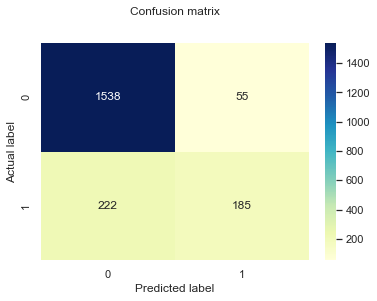

In [34]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
p=sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
from sklearn.metrics import roc_curve
y_pred_proba=clf_cv.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)

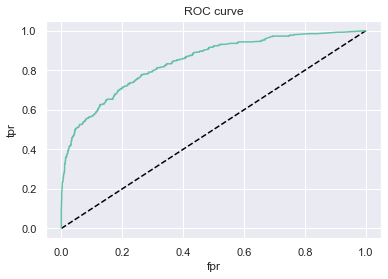

0.8428374445323598


In [36]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='svc')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_proba))